# Déclaration

In [1]:
from importlib import reload
import numpy as np
import time
import datetime
import pyautogui
import pandas as pd
import re
import keyboard
import os
import tool
reload(tool)
import easyocr
from PIL import ImageGrab,Image

import cv2

In [ ]:
from pokereval.card import Card
from pokereval.hand_evaluator import HandEvaluator

hole = [Card(2, 1), Card(7, 3)]
board = []
score = HandEvaluator.evaluate_hand(hole, board)
score

0.04524886877828049

: 

In [78]:
board = g.etat['board']
hole = g.etat['me_card']
score = HandEvaluator.evaluate_hand(hole, board)
score**5

0.007075872059404462

# Main

### view

In [2]:
# 2 boutons + new fichier

import threading
import time
import PySimpleGUI as sg
import objet.controller as controller
from importlib import reload
reload(controller)

def update_table(window, controller):
    multiline = window['-MULTILINE-']
    multiline.update(value=controller)

layout = [
    [sg.Button('Lancer le scan', key='-SCAN-')],
    [sg.Button('Draw', key='-DRAW-')],  # Add this line for the Draw button
    [sg.Multiline(size=(80, 20), key='-MULTILINE-')],  # Replace Table with Multiline
    [sg.Button('Quitter')]
]

window = sg.Window('Interface Graphique', layout, location=(3245,140), size=(1200, 800), finalize=True)

controller = controller.Controller()
scan_thread = None

def scan_thread_function():
    while controller.running:
        scan_table = controller.main()
        update_table(window, scan_table)
        window.refresh()  # Update GUI
        time.sleep(0.5)  # Wait 0.5 second

while True:
    event, values = window.read()
    
    if event == sg.WINDOW_CLOSED or event == 'Quitter':
        controller.running = False  # Stop the scan thread
        break
    elif event == '-SCAN-':
        if not controller.running:
            controller.running = True
            scan_thread = threading.Thread(target=scan_thread_function)
            scan_thread.start()  # Start the scan thread if not already done
    elif event == '-DRAW-':  # Handle the Draw button event
        controller.draw()  # Call the draw method from the controller
window.close()


ERROR:root:Symbole de carte non détecté.
ERROR:root:Symbole de carte non détecté.
Exception in thread Thread-36 (scan_thread_function):
Traceback (most recent call last):
  File "c:\Users\polo\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\polo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\polo\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\polo\AppData\Local\Temp\ipykernel_1416\671098818.py", line 28, in scan_thread_function
    scan_table = controller.main()
                 ^^^^^^^^^^^^^^^^^
  File "c:\Users\polo\Pictures\Cours Info\Bot trading\bot poker\objet\controller.py", line 35, in main
    self.game.etat= self.game.scan_to_data_table(self.scan.table)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [6]:
# scan.reader.show_ocr_empty()
# scan.reader.show_bug()
controller.scan.table

NameError: name 'controller' is not defined

In [10]:
import os

# Dossier à parcourir (dossier courant)
dossier_courant = '.'
dossiers_a_parcourir= ["objet","folder_tool"]#dossier_courant
# Ceci représente le dossier où vous exécutez le script

# Extensions des fichiers à rechercher
extensions_recherche = ('.py') #'.ipynb')

# Parcourir le dossier courant et ses sous-dossiers
for dossier in dossiers_a_parcourir:
    for racine, sous_dossiers, fichiers in os.walk(dossier):
        for fichier in fichiers:
            if fichier.endswith(extensions_recherche):
                chemin_fichier = os.path.join(racine, fichier)
                try:
                    with open(chemin_fichier, 'r', encoding='utf-8') as infile:
                        texte = infile.read()
                        print(f'--- Début du fichier: {chemin_fichier} ---\n')
                        print(texte)
                        print(f'\n--- Fin du fichier: {chemin_fichier} ---\n')
                except Exception as e:
                    print(f"Erreur lors de la lecture de {chemin_fichier}: {e}")


--- Début du fichier: objet\bouton.py ---

import logging
import unicodedata
import re
import tool
class Action:
    POSSIBLE_ACTIONS_BOUTON = ["parole", "suivre", "relancer a", "se coucher", "miser"]
    liste_actions = POSSIBLE_ACTIONS_BOUTON + ["pas en jeu", "relance à fois 4", "close"]  # À améliorer

    def __init__(self, name=None, value=None):
        """
        Initialise une Action avec un nom et une valeur optionnelle.
        
        Args:
            name (str): Le nom de l'action (e.g., "Suivre").
            value (float): La valeur associée à l'action (e.g., montant à miser).
        """
        self.name = name
        self.value = value

    def __repr__(self):
        return f"Action(name={self.name}, value={self.value})"

    @classmethod
    def _normalize_string(cls, s):
        """
        Convertit une chaîne en minuscules et enlève les accents.
        
        Args:
            s (str): La chaîne à normaliser.
        
        Returns:
            str: La ch

## test

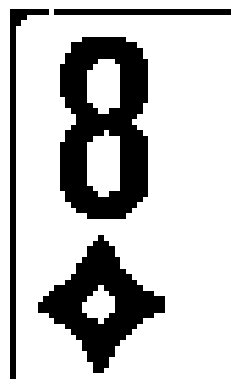

Texte reconnu : 8



In [20]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Chemin vers tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Charger l'image
# image = cv2.imread('screen\ApplicationFrameHost_X7ty3jtllg.png')
image = cv2.imread('screen/ApplicationFrameHost_8wm5zjLIv7.png')

gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarisation adaptative
image_bin = cv2.adaptiveThreshold(gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Conversion en image PIL
image_pil = Image.fromarray(image_bin)

# Appliquer Tesseract pour extraire le texte
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789JQKA'
texte = pytesseract.image_to_string(image_pil, config=custom_config)

# Afficher l'image avec PIL
plt.imshow(image_bin, cmap='gray')
plt.axis('off')  # Désactiver les axes pour une vue propre
plt.show()
# Afficher le texte extrait
print("Texte reconnu :", texte)


Traitement des images:   0%|          | 0/14 [00:00<?, ?it/s]

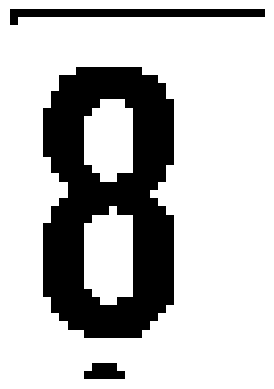

Traitement des images:   7%|▋         | 1/14 [00:00<00:01,  9.90it/s]

Texte extrait de ApplicationFrameHost_2XacUB4uZD.png :
8




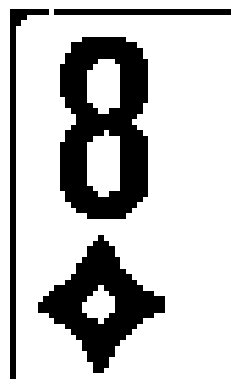

Texte extrait de ApplicationFrameHost_8wm5zjLIv7.png :
8




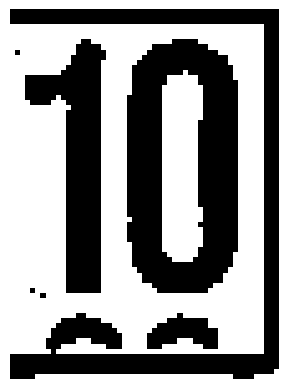

Traitement des images:  21%|██▏       | 3/14 [00:00<00:01, 10.20it/s]

Texte extrait de ApplicationFrameHost_9A8mX2f2MT.png :
10




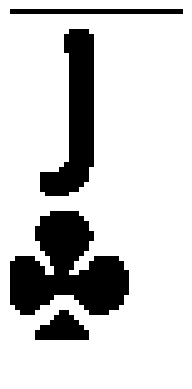

Texte extrait de ApplicationFrameHost_DkXl0u9fkI.png :
J




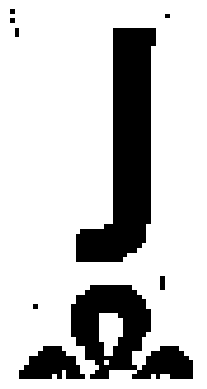

Traitement des images:  36%|███▌      | 5/14 [00:00<00:00, 10.39it/s]

Texte extrait de ApplicationFrameHost_EYXVMUBk6E.png :
J




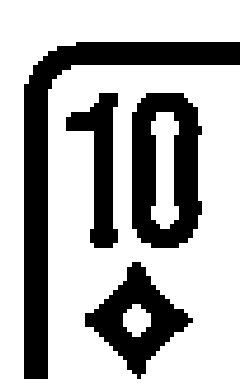

Texte extrait de ApplicationFrameHost_ibNaaxsrOq.png :




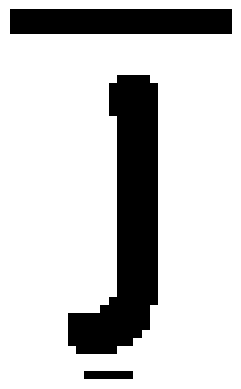

Traitement des images:  50%|█████     | 7/14 [00:00<00:00, 10.52it/s]

Texte extrait de ApplicationFrameHost_jShPIEh6Dg.png :
J




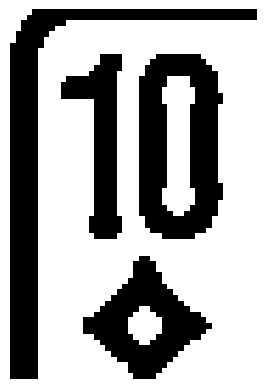

Texte extrait de ApplicationFrameHost_rTlLIcAxfs.png :
8




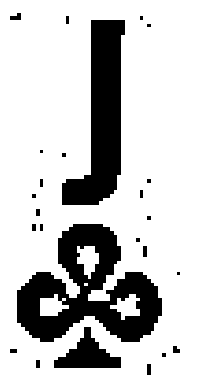

Traitement des images:  64%|██████▍   | 9/14 [00:00<00:00,  9.49it/s]

Texte extrait de ApplicationFrameHost_X7ty3jtllg.png :
J




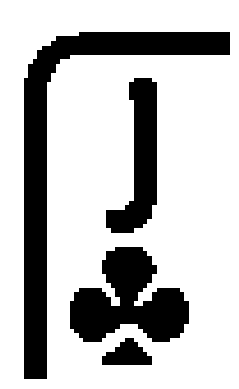

Texte extrait de ApplicationFrameHost_XwsHZ7Q1Ru.png :
2




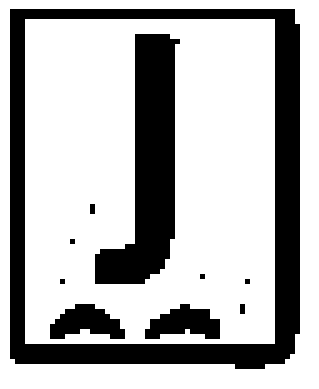

Traitement des images:  79%|███████▊  | 11/14 [00:01<00:00,  9.75it/s]

Texte extrait de ApplicationFrameHost_zZ0lCN7EEQ.png :
J




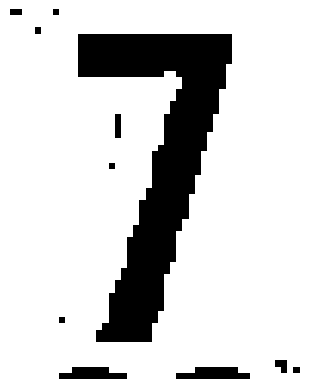

Texte extrait de NVIDIA_Share_hFGa8tScr7.png :




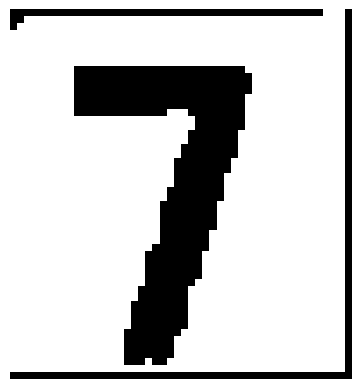

Traitement des images:  93%|█████████▎| 13/14 [00:01<00:00,  9.91it/s]

Texte extrait de NVIDIA_Share_SpCtkuOOYZ.png :
7




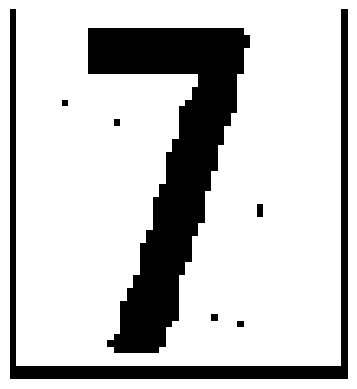

Traitement des images: 100%|██████████| 14/14 [00:01<00:00,  9.95it/s]

Texte extrait de NVIDIA_Share_wGKm4umIoK.png :
7



Temps de traitement total : 1.41 secondes


In [3]:
import os
import time
from PIL import Image
import pytesseract
from tqdm import tqdm  # Importation de tqdm pour la barre de progression



# Chemin vers le dossier contenant les images
dossier_images = 'screen'

# Liste des extensions d'images acceptées
extensions_acceptees = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

# Obtenir la liste des fichiers dans le dossier
fichiers = os.listdir(dossier_images)

# Filtrer les fichiers pour ne garder que les images
images = [f for f in fichiers if f.lower().endswith(extensions_acceptees)]

# Enregistrer le temps de début total
somme_time=0
temps_debut_total=time.time()
# Parcourir chaque image avec une barre de progression
for nom_image in tqdm(images, desc="Traitement des images"):
    chemin_image = os.path.join(dossier_images, nom_image)
    
    image = cv2.imread(chemin_image)
    
    # Enregistrer le temps de début pour cette image
    temps_debut = time.time()
    
    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_bin = cv2.adaptiveThreshold(gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    image_pil = Image.fromarray(image_bin)
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789JQKA'


    texte = pytesseract.image_to_string(image_pil, config=custom_config)
    plt.imshow(image_bin, cmap='gray')
    plt.axis('off')  # Désactiver les axes pour une vue propre
    plt.show()
    # Enregistrer le temps de fin pour cette image
    temps_fin = time.time()
    
    # Calculer le temps de traitement pour cette image
    somme_time += temps_fin - temps_debut
    
    # Afficher le texte extrait pour cette image
    print(f"Texte extrait de {nom_image} :\n{texte}\n")

# Enregistrer le temps de fin total
temps_fin_total = time.time()

# Calculer le temps de traitement total
temps_traitement_total = temps_fin_total - temps_debut_total
print(f"\nTemps de traitement total : {temps_traitement_total:.2f} secondes")


In [17]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [53]:
import easyocr
reader = easyocr.Reader(['en'])
a=reader.readtext("screen/NVIDIA_Share_hFGa8tScr7.png")
a

[([[5, 3], [41, 3], [41, 55], [5, 55]], '7', 0.999985933353301)]